# 6ª aula: Complex networks and colorings

### Brute force algorithm

Input: A planar graph 𝐺(𝑉,𝐸)

Output: A printed list of every valid 4 coloring of 𝐺

For all functions 𝑓:𝑉→{1,2,3,4}

If 𝑓(𝑉) is a valid coloring of 𝐺

Print 𝑓(𝑉)

## Definir funções necessárias:

>### is_valid_coloring:
>
> Encarregada de, dada uma combinação de cores, decidir se a combinação é válida no grafo em questão

>### coloring_f:
>
> Encarregada de criar todas as combinações possíveis de cores numa lista de nodos e devolver apenas as combinações viáveis

>### unique_colors:
>
> Devolve o número de cores únicas numa combinação


In [133]:
from itertools import combinations_with_replacement

def coloring_f(max_colors):
    all_combinations = combinations_with_replacement(list(range(max_colors)),len(G.nodes))
    valid_coloring = []
    for combination in all_combinations:
        if(is_valid_coloring(combination)):
            valid_coloring.append(combination)
    return valid_coloring

def is_valid_coloring(colors):
    for u in G.nodes():
        for v in G.neighbors(u):
            if colors[u] == colors[v]:
                return False
    return True

def unique_colors(combination):
    color_list = []
    for color in combination:
        if color not in color_list:
            color_list.append(color)
    return len(color_list)



Criar o grafo a ser analisado de forma dinámica, podendo variar o número de nodos e a quantidade de ligações entre nodos

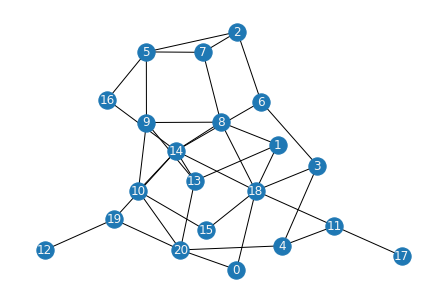

In [134]:
import networkx as nx 
from random import randint

node_number = 20
edginess = 2 # defines edges per node

H = nx.Graph()
for i in range(node_number):
    H.add_node(i)

G = nx.Graph()
G.add_nodes_from(sorted(H.nodes(data=True)))

edges = node_number * edginess
for edge in range(0,round(edges)):
    node1 = randint(0,node_number)
    node2 = randint(0,node_number)
    if(node1 == node2):
        node1 += 1
        if(node1 > node_number):
            node1 -= 2;
        if(node1 <= 0):
            raise("error");
    G.add_edge(node1,node2)

nx.draw_kamada_kawai(G, with_labels = True,font_color = "whitesmoke",font_size=12)

Definir número máximo de cores e dicionário de cores disponíveis para pintar o grafo

In [135]:
max_color = 11

color = dict()
color[0] = "#00FCFC"
color[1] = "#0D7F7F"
color[2] = "#2B4646"
color[3] = "#8FE499"
color[4] = "#21CC36"
color[5] = "#085A12"
color[6] = "#740FE7"
color[7] = "#B394D6"
color[8] = "#E2153D"
color[9] = "#B27527"
color[10] = "#000000"


In [136]:
combinations = coloring_f(max_color)

Plot a random solution

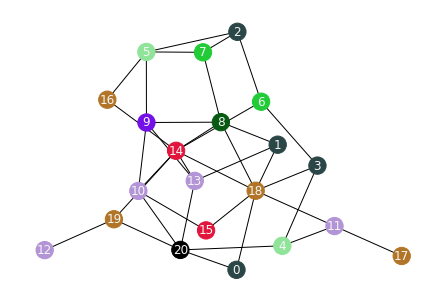

In [137]:
if len(combinations) == 0:
    nx.draw_kamada_kawai(G, with_labels = True,font_color = "whitesmoke",font_size=17)
    print("no solution found")
else:
    color_map = [color[color_combination] for color_combination in combinations[-1]]
    nx.draw_kamada_kawai(G, with_labels = True, node_color=color_map,font_color = "whitesmoke",font_size=12)
    [color[color_combination] for color_combination in combinations[1]]


Number of total valid solutions

In [138]:
len(combinations)

564

Plot a solution with minimim colors

In [139]:
minimum_colors = max_color
min_color_combination_idx = 0

for i in range(0,len(combinations)):
    combination_colors = unique_colors(combinations[i])
    if(combination_colors < minimum_colors):
        minimum_colors = combination_colors
        min_color_combination_idx = i

minimum_color_combination = combinations[min_color_combination_idx]
print("minimum-colors: " + str(minimum_colors))

minimum-colors: 9


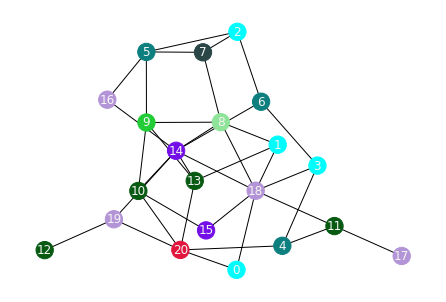

In [140]:
color_map = [color[color_combination] for color_combination in minimum_color_combination]
nx.draw_kamada_kawai(G, with_labels = True, node_color=color_map,font_color = "whitesmoke",font_size=12)